<a href="https://colab.research.google.com/github/Vaidik-Bhongade/Network_Intrusion_Detection-/blob/main/IntrutionDetectionsystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
dataset = pd.read_csv('Train_data.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [53]:
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [55]:
dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
dataset.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


<Axes: xlabel='class', ylabel='count'>

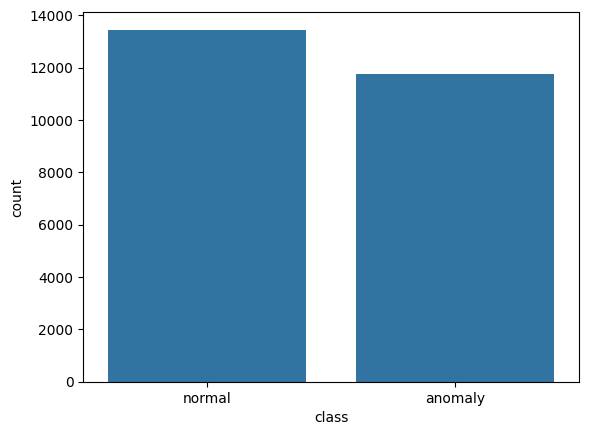

In [57]:
import seaborn as sns
sns.countplot(x=dataset['class'])

In [58]:
print('Class distribution Training set:')
print(dataset['class'].value_counts())

Class distribution Training set:
normal     13449
anomaly    11743
Name: class, dtype: int64


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = [1, 2, 3]
for col_index in categorical_columns:
    x_train[:, col_index] = le.fit_transform(x_train[:, col_index].reshape(-1, 1))
    x_test[:, col_index] = le.fit_transform(x_test[:, col_index].reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [61]:
print(x_train.shape)
print(x_test.shape)

(18894, 41)
(6298, 41)


Decission Tree Classificatoon

In [62]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=4)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
DTC_train = accuracy_score(y_train, classifier.predict(x_train))
DTC_test = accuracy_score(y_test, y_pred)

[[2784  127]
 [  23 3364]]


In [64]:
import time
from sklearn.metrics import accuracy_score

#training
start_time = time.time()
classifier.fit(x_train, y_train)
end_time = time.time()
training_time = end_time-start_time

#testing
start_time = time.time()
y_test = classifier.predict(x_test)
end_time = time.time()
testing_time = end_time-start_time

print("Training time: ",training_time)
print("Testing time: ", testing_time)


Training time:  0.10778927803039551
Testing time:  0.0195159912109375


Random Forest Classification

In [65]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
RFC_train = accuracy_score(y_train, classifier.predict(x_train))
RFC_test = accuracy_score(y_test, y_pred)

[[2787   20]
 [ 123 3368]]


In [67]:
#training
start_time = time.time()
classifier.fit(x_train, y_train)
end_time = time.time()
training_time = end_time-start_time

#testing
start_time = time.time()
y_test = classifier.predict(x_test)
end_time = time.time()
testing_time = end_time-start_time

print("Training time: ",training_time)
print("Testing time: ", testing_time)

Training time:  0.19499754905700684
Testing time:  0.025631427764892578


K-Nearest Neighbors (KNN)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
KNN_train = accuracy_score(y_train, classifier.predict(x_train))
KNN_test = accuracy_score(y_test, y_pred)

[[2886   24]
 [  28 3360]]


Multi-layer Perception (Neural Network)

In [70]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(130, 55), max_iter=2000, activation='relu')
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(130, 55), max_iter=2000)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = mlp.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
MLP_train = accuracy_score(y_train, mlp.predict(x_train))
MLP_test = accuracy_score(y_test, y_pred)

[[2754  156]
 [  77 3311]]


In [72]:
#training
start_time = time.time()
mlp.fit(x_train, y_train)
end_time = time.time()
training_time = end_time-start_time

#testing
start_time = time.time()
mlp.predict(x_test)
end_time = time.time()
testing_time = end_time-start_time

print("Training time: ",training_time)
print("Testing time: ", testing_time)

Training time:  7.858345031738281
Testing time:  0.042990684509277344


In [73]:
from tabulate import tabulate
data = [["Decision Tree", DTC_train, DTC_test],
        ["Random Forest", RFC_train, RFC_test],
        ["KNN", KNN_train, KNN_test],
        ["MLP", MLP_train, MLP_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════════╤═══════════════╤══════════════╕
│ Model         │   Train Score │   Test Score │
╞═══════════════╪═══════════════╪══════════════╡
│ Decision Tree │      0.980258 │     0.976183 │
├───────────────┼───────────────┼──────────────┤
│ Random Forest │      0.999788 │     0.977294 │
├───────────────┼───────────────┼──────────────┤
│ KNN           │      0.99476  │     0.991743 │
├───────────────┼───────────────┼──────────────┤
│ MLP           │      0.959987 │     0.963004 │
╘═══════════════╧═══════════════╧══════════════╛


In [84]:
SEED = 42

# Decision Tree Model
dtc = DecisionTreeClassifier()

# Random forest
rfc = RandomForestClassifier()

# KNN
knn = KNeighborsClassifier()

# Multi-layer Perception
Mlp = MLPClassifier()

In [85]:
from sklearn.model_selection import cross_val_score
models = {}
models['decisionTreeclassifier']=dtc
models['RandomForestClassifier']=rfc
models['KNeighborClassifier']=knn
models['Multi-layerPerception']=mlp

In [86]:
scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], x_train, y_train, cv=10, scoring=scorer)


In [87]:
def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()

************** decisionTreeclassifier Model Validation **************
Mean precision: 
 99.41 % +- 0.25

Mean recall: 
 99.58 % +- 0.21

************** RandomForestClassifier Model Validation **************
Mean precision: 
 99.54 % +- 0.19

Mean recall: 
 99.86 % +- 0.1

**************** KNeighborClassifier Model Validation ****************
Mean precision: 
 98.92 % +- 0.26

Mean recall: 
 98.81 % +- 0.34

*************** Multi-layerPerception Model Validation ***************
Mean precision: 
 96.16 % +- 1.67

Mean recall: 
 95.31 % +- 1.32



<Axes: >

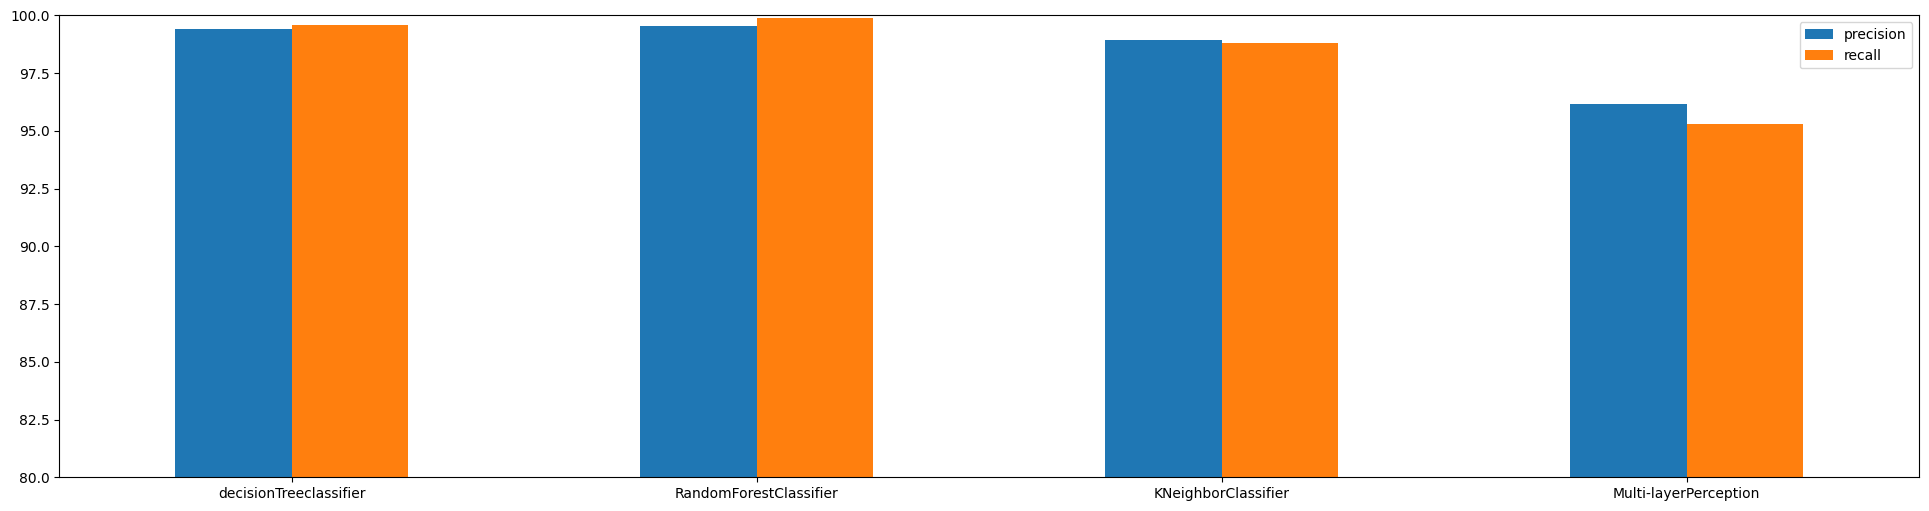

In [88]:
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar",  ylim=[80,100], figsize=(24,6), rot=0)


In [89]:
models = {}
models['decisionTreeclassifier']=dtc
models['RandomForestClassifier']=rfc
models['KNeighborClassifier']=knn
models['Multi-layerPerception']=mlp

In [90]:
preds={}
for name in models:
    models[name].fit(x_train, y_train)
    preds[name] = models[name].predict(x_test)
print("Predictions complete.")

Predictions complete.


In [91]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

************** decisionTreeclassifier Model Testing **************
[[2897   13]
 [   9 3379]]
--------------
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      2910
     anamoly       1.00      1.00      1.00      3388

    accuracy                           1.00      6298
   macro avg       1.00      1.00      1.00      6298
weighted avg       1.00      1.00      1.00      6298

************** RandomForestClassifier Model Testing **************
[[2902    8]
 [   2 3386]]
--------------
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      2910
     anamoly       1.00      1.00      1.00      3388

    accuracy                           1.00      6298
   macro avg       1.00      1.00      1.00      6298
weighted avg       1.00      1.00      1.00      6298

**************** KNeighborClassifier Model Testing ****************
[[2875   35]
 [  30 3358]]
----------------
              pr

<Axes: >

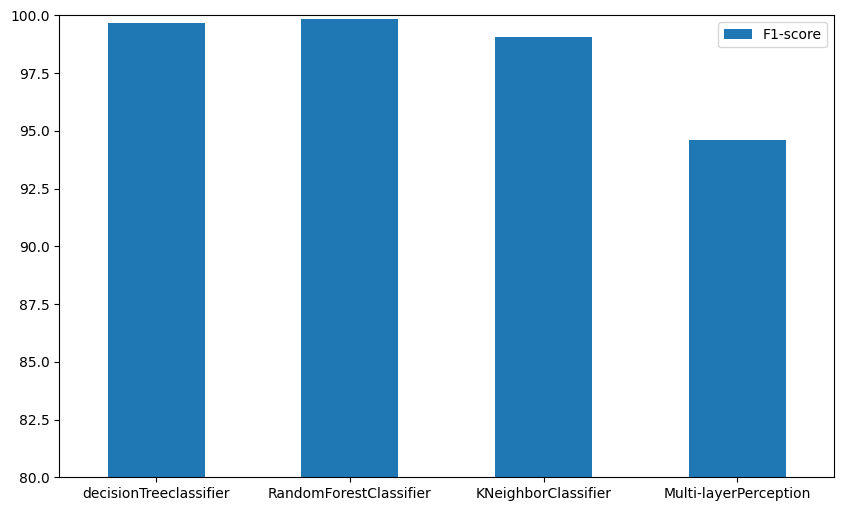

In [92]:
f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)
